# Start

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
folder = Path(
    "/Users/kristianbraad/Library/CloudStorage/OneDrive-Aarhusuniversitet/"
    "4. Semester/Dataprojekt/Dataprojekt AU 2026/2023 AAR vaskeri data"
)
files = list(folder.glob("PLC*.xlsx"))            # matches PLC, Product....xlsx etc.

dfs = []
for f in files:
    df = pd.read_excel(f, header=2)                         # optionally: sheet_name="Sheet1"
    df["source_file"] = f.name                    # helpful traceability
    dfs.append(df)

all_data = pd.concat(dfs, ignore_index=True)
print(all_data.shape)
print(all_data.columns)

(248711, 7)
Index(['Produkt - Produkt', 'Kassationsårsag (ui)',
       'Stk. tøj per kassationsdato', 'Dage i cirkulation', 'Total antal vask',
       'Unik Kode (ui)', 'source_file'],
      dtype='object')


In [5]:
group_col = "Produkt - Produkt"

groups = {gid: gdf.copy() for gid, gdf in all_data.groupby(group_col, dropna=False)}
print("Number of groups:", len(groups))
print("Example group keys:", list(groups.keys())[:10])



Number of groups: 1958
Example group keys: ['00066 Kokkejakke Sort Lechef P/B', '00100 Unisexben Lårl & Toml Mblåpb', '00101 Kit Kina H 2Indv Mblå Trykkn', '00215 Termojakke Hvid', '00221 Termovest Hvid', '00262 Shorts Hr Grå/Sort P/B', '00264 Forkl M/Smæk Grå P/B', '00281 Sweatshirt Grafitmelan 70/30', '00379 Benkl Vente Navy P/B', '00448 Kedeldr Polar M/H Mblå']


In [6]:
# Grouping
groups = {k: g.copy() for k, g in all_data.groupby(group_col, dropna=False)}

In [7]:
groups["04198 Benkl Hr Navy"]

,Produkt - Produkt,Kassationsårsag (ui),Stk. tøj per kassationsdato,Dage i cirkulation,Total antal vask,Unik Kode (ui),source_file
15343,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,6151,169,00D003914A68,"PLC, Product detaljeret, Aarhus, Okt. 2023.xlsx"
16965,04198 Benkl Hr Navy,Alm.slid uden restværdi,1,2281,151,30155C97D461A7C000A477D5,"PLC, Product detaljeret, Aarhus, Okt. 2023.xlsx"
36764,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,2862,85,00D009C13FEA,"PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx"
41272,04198 Benkl Hr Navy,Misligholdt med restværdi,1,1652,66,00D00589587C,"PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx"
41405,04198 Benkl Hr Navy,Alm.slid uden restværdi,1,1627,76,00D005893876,"PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx"
49842,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,504,1,30155C97D461A6C00092C5E4,"PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx"
49843,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,504,6,30155C97D461A6C00092C6C1,"PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx"
79209,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,5785,153,00D00513814B,"PLC, Product detaljeret, Aarhus, Aug. 2023.xlsx"
146332,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,6688,153,00D0041133A8,"PLC, Product detaljeret, Aarhus, Sep. 2023.xlsx"
146333,04198 Benkl Hr Navy,"Kass. af RETUR,MINIMU,afmeld",1,6688,150,00D00438F331,"PLC, Product detaljeret, Aarhus, Sep. 2023.xlsx"


In [8]:
summary = (
    all_data
    .groupby(["Produkt - Produkt", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .reset_index()
)
print(summary)

                       Produkt - Produkt                 Kassationsårsag (ui)  \
0       00066 Kokkejakke Sort Lechef P/B            Misligholdt med restværdi   
1     00100 Unisexben Lårl & Toml Mblåpb              Alm.slid uden restværdi   
2     00100 Unisexben Lårl & Toml Mblåpb              BTS fejl uden restværdi   
3     00100 Unisexben Lårl & Toml Mblåpb             Bortkommet med restværdi   
4     00100 Unisexben Lårl & Toml Mblåpb                       Fejlopmærkning   
...                                  ...                                  ...   
6011   35040 Benkl Da M/Ela 2 Lom HV P/B  Ødelagt af lommefyld uden restværdi   
6012    35057 Test shorts Aarhus Kommune              Alm.slid uden restværdi   
6013    35057 Test shorts Aarhus Kommune             Bortkommet med restværdi   
6014    35057 Test shorts Aarhus Kommune                         Udgået Model   
6015    35134 Forklæde recycled JTK sort              BTS fejl uden restværdi   

      Stk. tøj per kassatio

In [9]:
most_discarded = (
    all_data
    .groupby("Produkt - Produkt")["Stk. tøj per kassationsdato"]
    .sum()
    .sort_values(ascending=False)
)

most_discarded.head(10)


Produkt - Produkt
09385 T-Shirt Hvid B/P M Arla Tryk    7200
23191 Benkl Mind pullon m opsmøg      7064
01083 T-Shirt unisex hvid k/æ P/B     6779
01589 T-shirt unisex mblå k/æ         6696
13084 T-shirt prowear dame navy pb    6152
14152 Benkl m/lom hvid low risk       5062
28793 Benkl M/Lom Grå Low Risk        4435
12143 Pull on let buks opsmøg mblå    4256
24781 Flex buks da CSR dark rock      4164
09813 T-Shirt Vask                    3781
Name: Stk. tøj per kassationsdato, dtype: int64

# Stackbar plots

## Grouperet

In [10]:

# Eventuelt kombiner alle til én DataFrame
samlet_df = all_data.copy()

# Brug mere specifik matching med word boundaries ellerrækkefølge
import re

# Metode 1: Prioriteret matching (bedste metode)
def kategoriser_produkt(produktnavn):
    produktnavn = str(produktnavn).lower()
    
    # Tjek i prioriteret rækkefølge (mest specifik først)
    if 'forklæde' in produktnavn:
        return 'Forklæde'
    elif 'shorts' in produktnavn:
        return 'Shorts'
    elif any(ord in produktnavn for ord in ['sweat']):
        return 'Sweatshirt'
    elif any(ord in produktnavn for ord in ['t-shirt', 'polo', 'tshirt']):
        return 'T-shirt'
    elif 'kittel' in produktnavn or re.search(r'\bkit[\s\.]', produktnavn):
        return 'Kittel'
    elif any(ord in produktnavn for ord in ['skjorte', 'skj.']):
        return 'Skjorte'
    elif any(ord in produktnavn for ord in ['jakke', 'vest', 'pilotjakke']):
        return 'Jakke'
    elif any(ord in produktnavn for ord in ['buks', 'bukser', 'benk', 'benklæder', 'unisexben', 'jeans']):
        return 'Bukser'
    elif 'sok' in produktnavn or 'strømpe' in produktnavn:
        return 'Sokker'
    elif 'overall' in produktnavn or 'kedeldr' in produktnavn or 'heldragt' in produktnavn:
        return 'Overall'
    elif 'busseron' in produktnavn:
        return 'Busseron'
    else:
        return 'Andet'

# Tilføj kategori
samlet_df['Kategori'] = samlet_df['Produkt - Produkt'].apply(kategoriser_produkt)

# Nu kan du filtrere uden overlap
skjorte_data = samlet_df[samlet_df['Kategori'] == 'Skjorte']
shorts_data = samlet_df[samlet_df['Kategori'] == 'Shorts']
buks_data = samlet_df[samlet_df['Kategori'] == 'Bukser']
tshirt_data = samlet_df[samlet_df['Kategori'] == 'T-shirt']
sweatshirt_data = samlet_df[samlet_df['Kategori'] == 'Sweatshirt']
jakke_data = samlet_df[samlet_df['Kategori'] == 'Jakke']
forklæde_data = samlet_df[samlet_df['Kategori'] == 'Forklæde']
sok_data = samlet_df[samlet_df['Kategori'] == 'Sokker']
kittel_data = samlet_df[samlet_df['Kategori'] == 'Kittel']
busseron_data = samlet_df[samlet_df['Kategori'] == 'Busseron']
andre_data = samlet_df[samlet_df['Kategori'] == 'Andet']

# Tjek resultater
print(samlet_df['Kategori'].value_counts())

Kategori
Bukser        77905
T-shirt       75396
Jakke         23404
Andet         20142
Skjorte       18147
Overall       11763
Sweatshirt     8503
Busseron       5735
Kittel         2868
Forklæde       2095
Shorts         2023
Sokker          730
Name: count, dtype: int64


### Skjorter

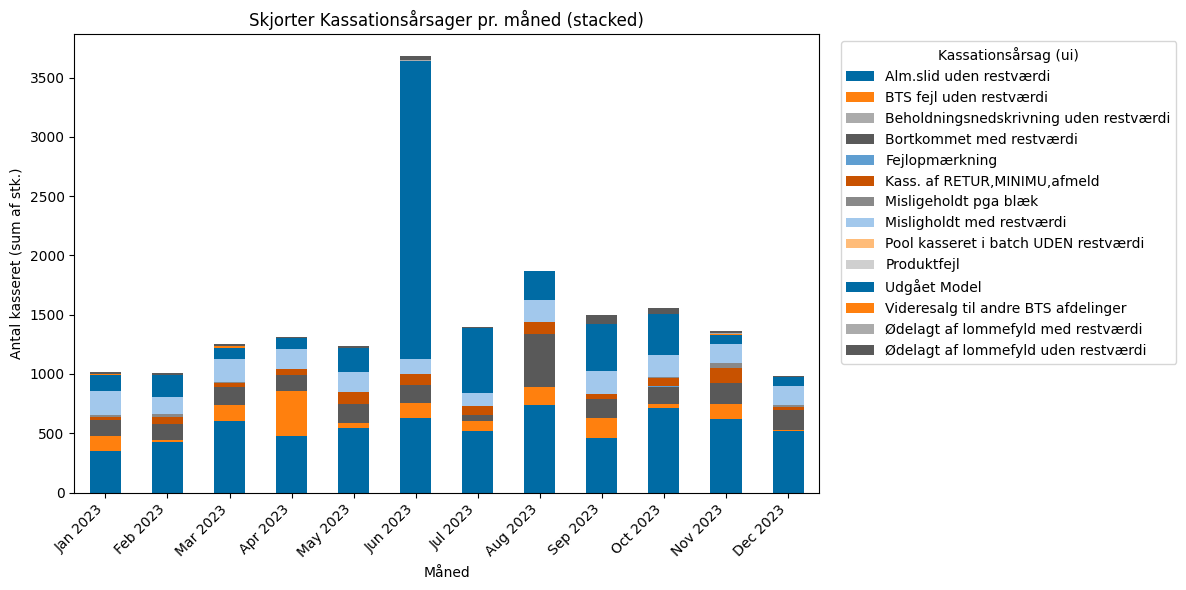

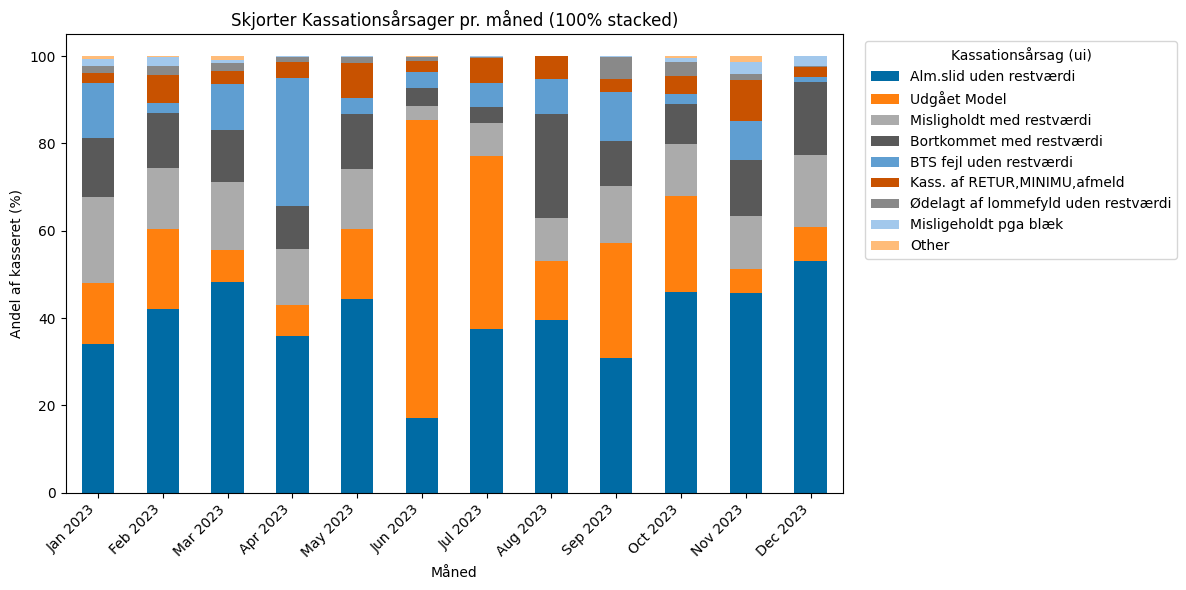

In [11]:

# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    skjorte_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Skjorter Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Skjorter Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

#### Shorts

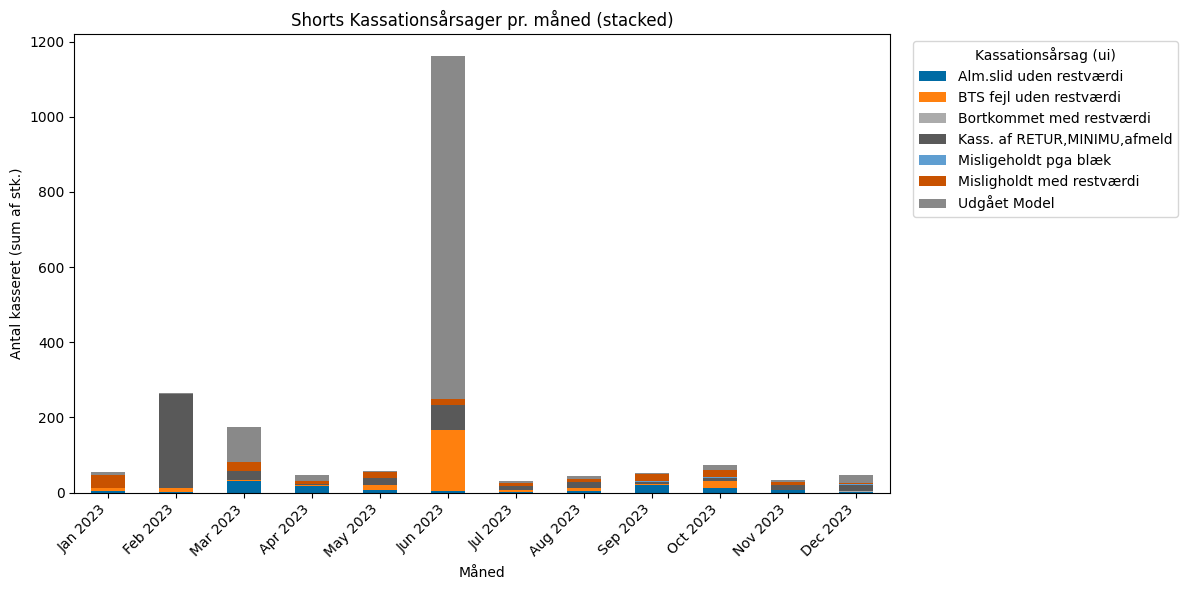

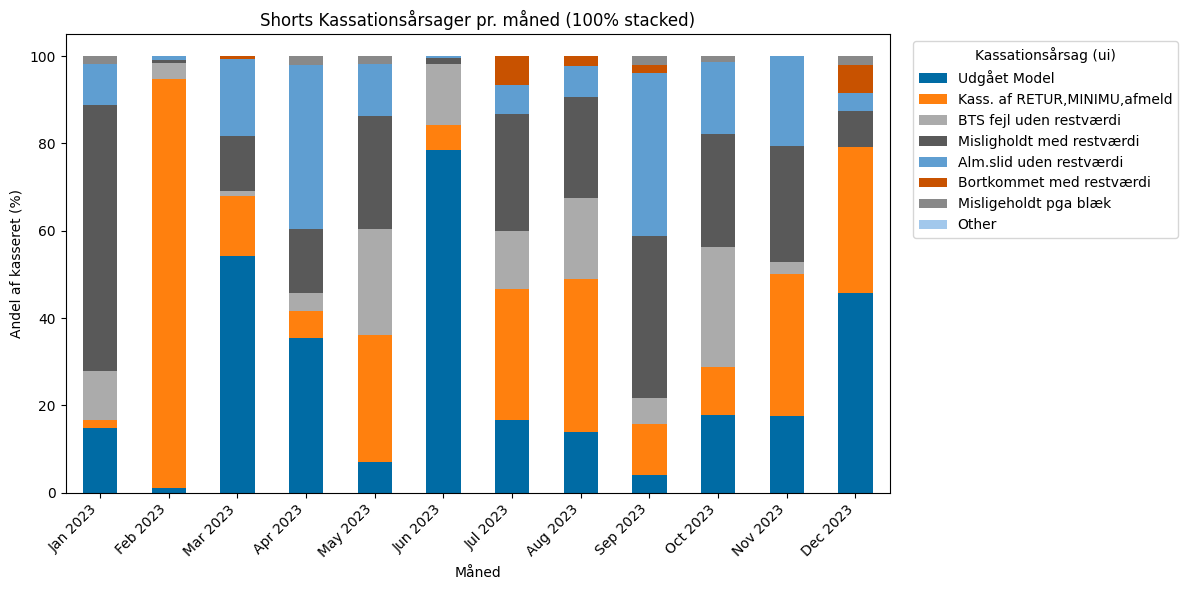

In [12]:
# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    shorts_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Shorts Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Shorts Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Bukser

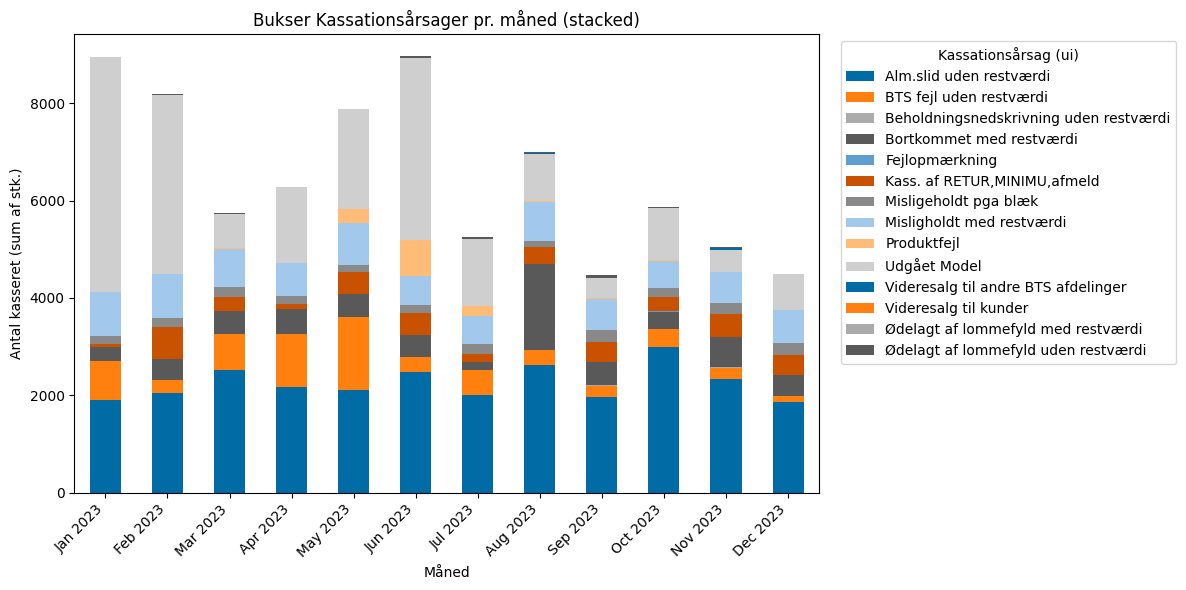

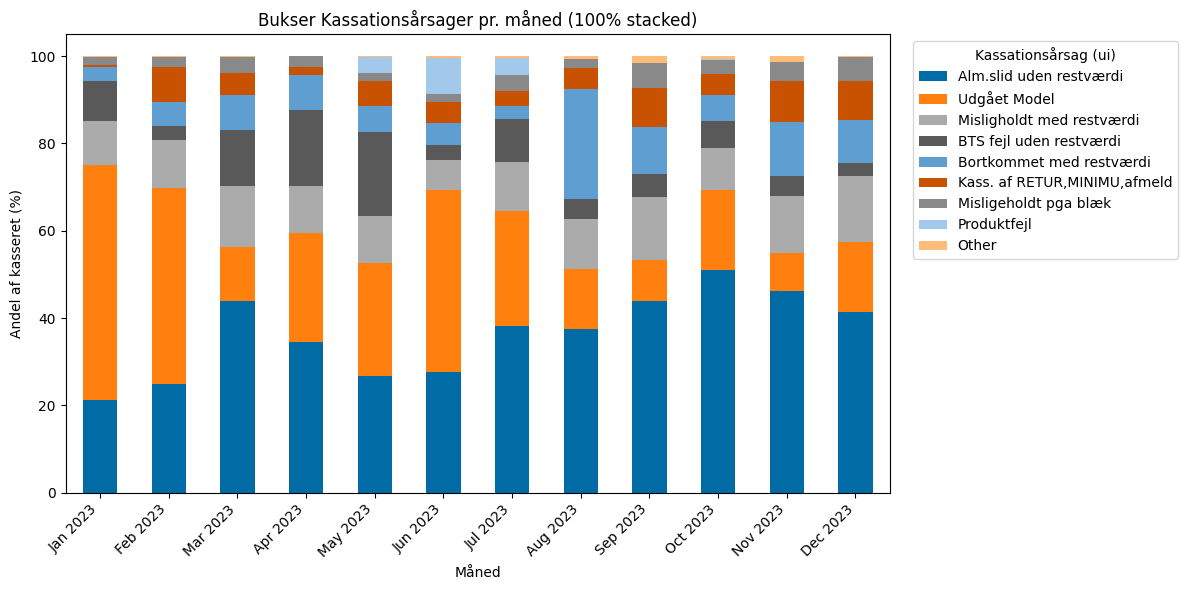

In [13]:
# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    buks_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Bukser Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Bukser Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

### t-shirts

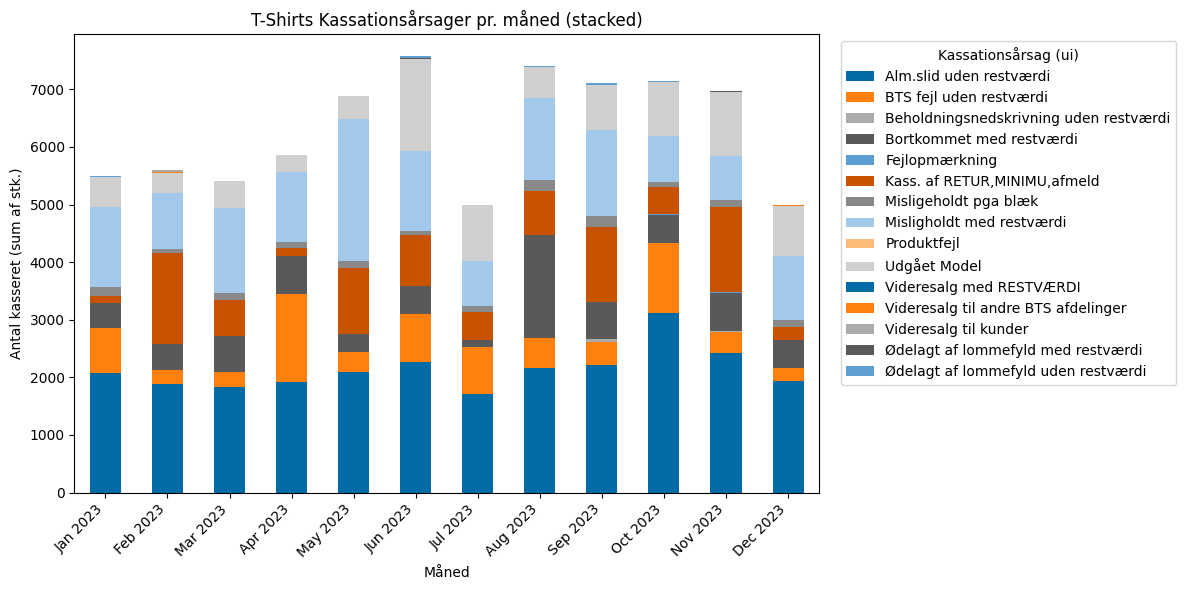

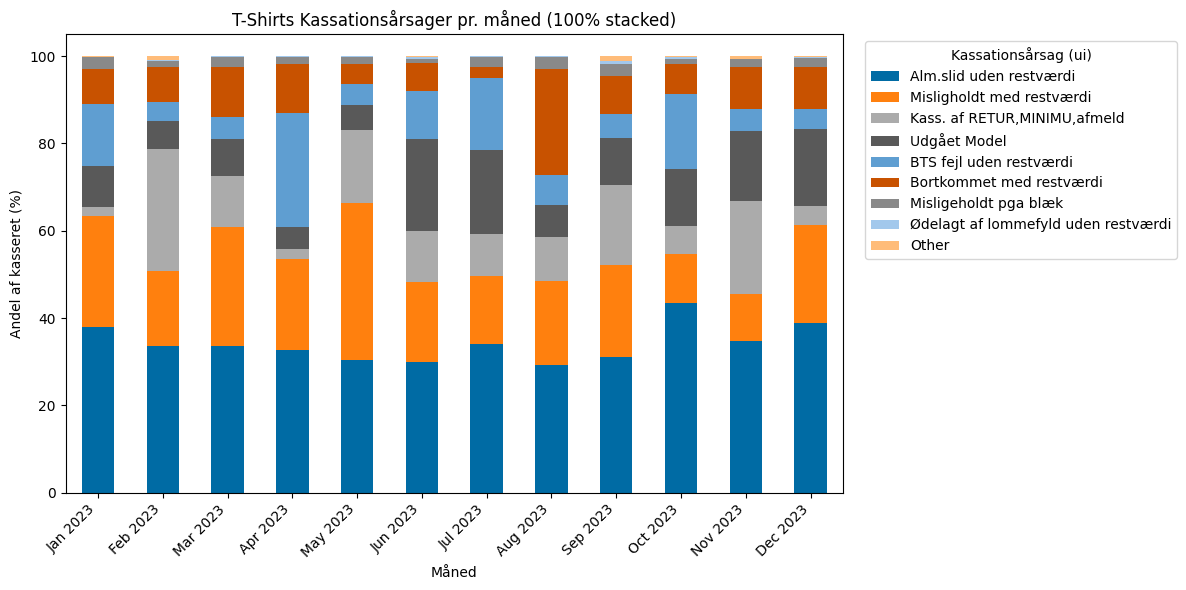

In [14]:
# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    tshirt_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("T-Shirts Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("T-Shirts Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Sweatshirt

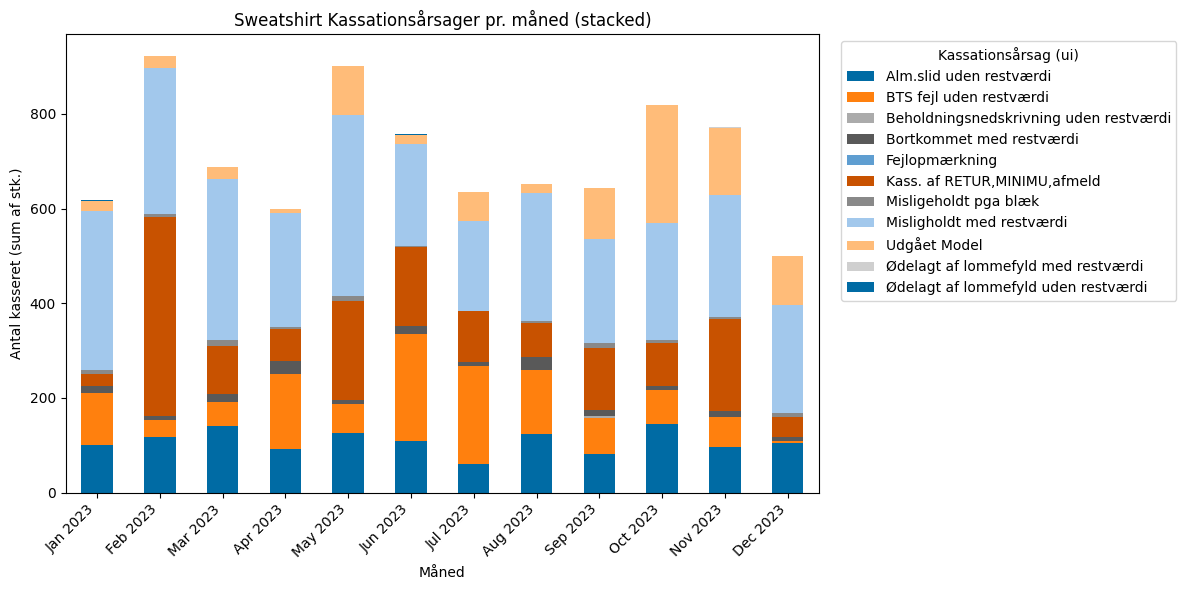

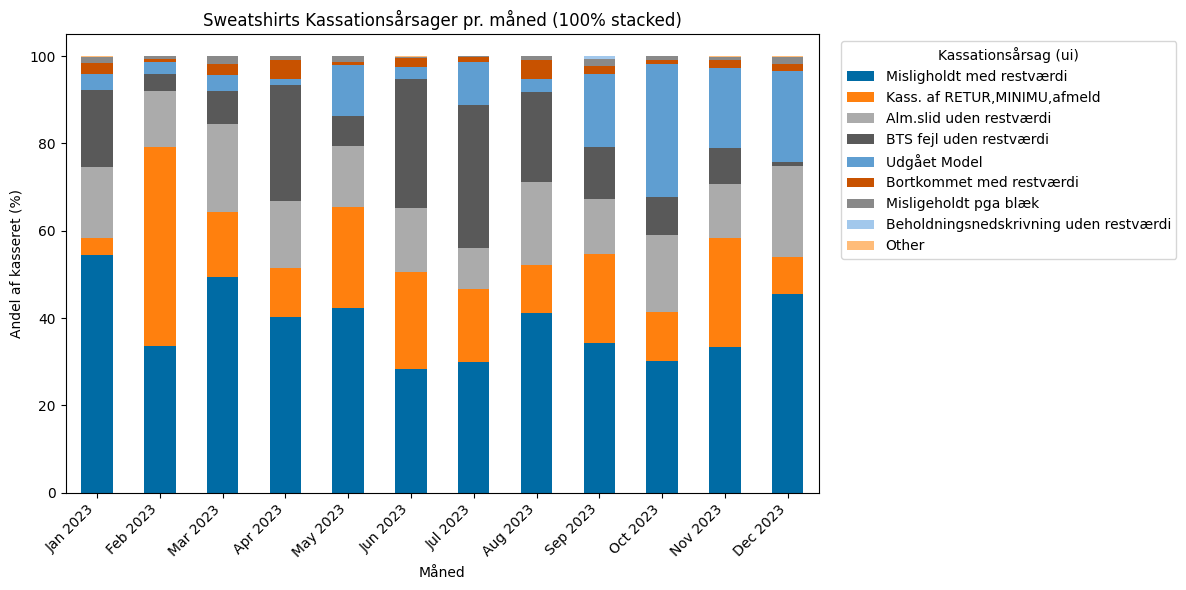

In [15]:
# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    sweatshirt_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Sweatshirt Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Sweatshirts Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Jakke

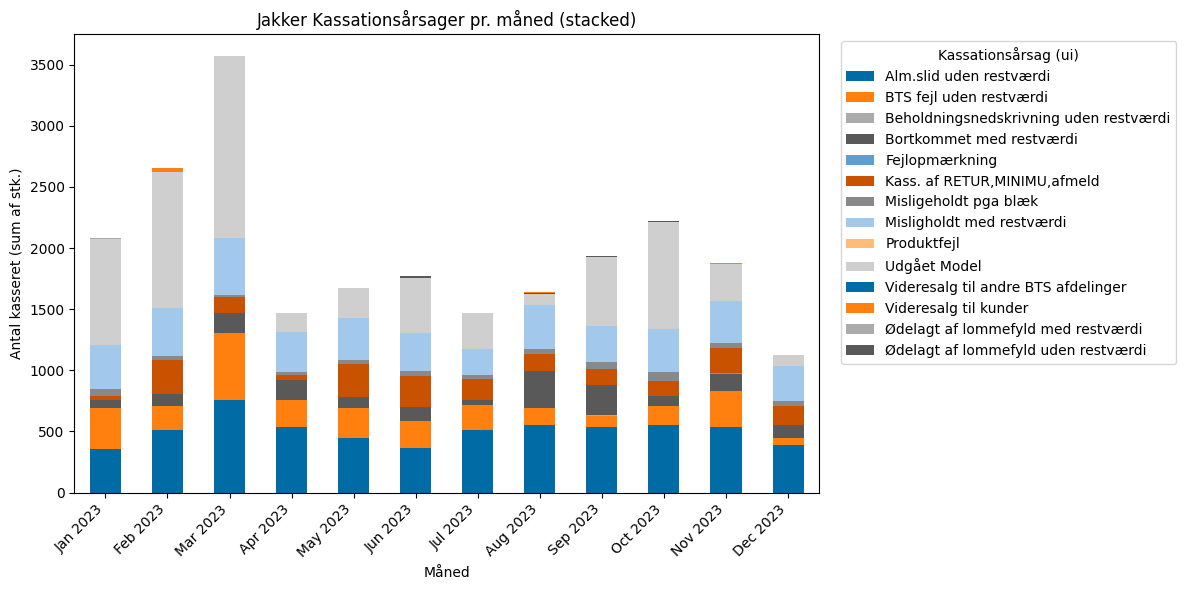

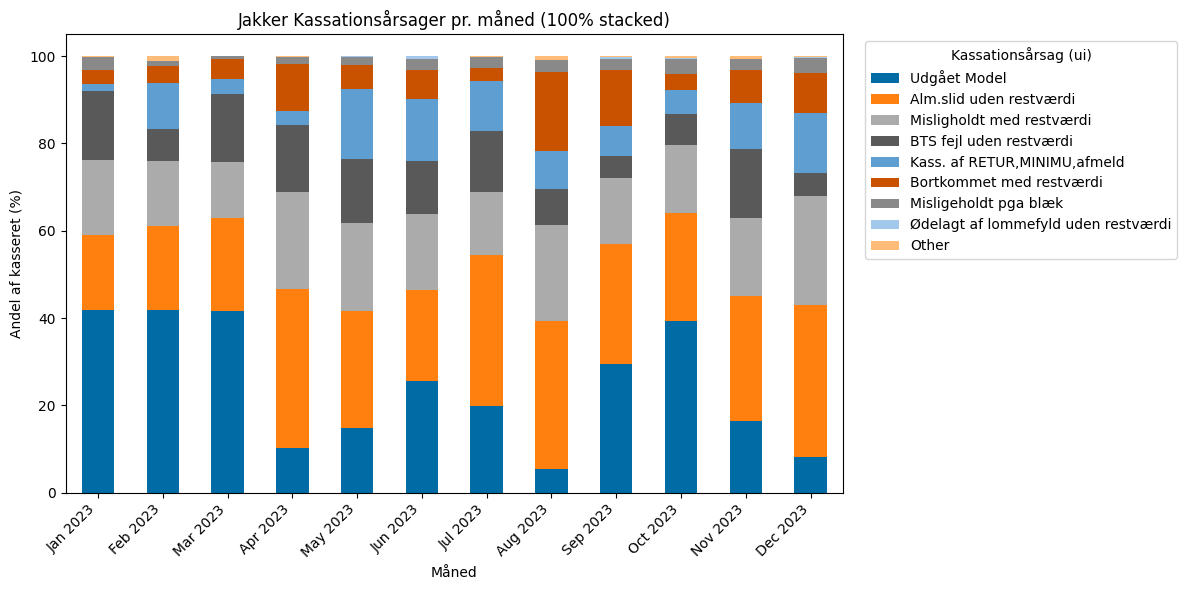

In [16]:
# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    jakke_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Jakker Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Jakker Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Forklæde

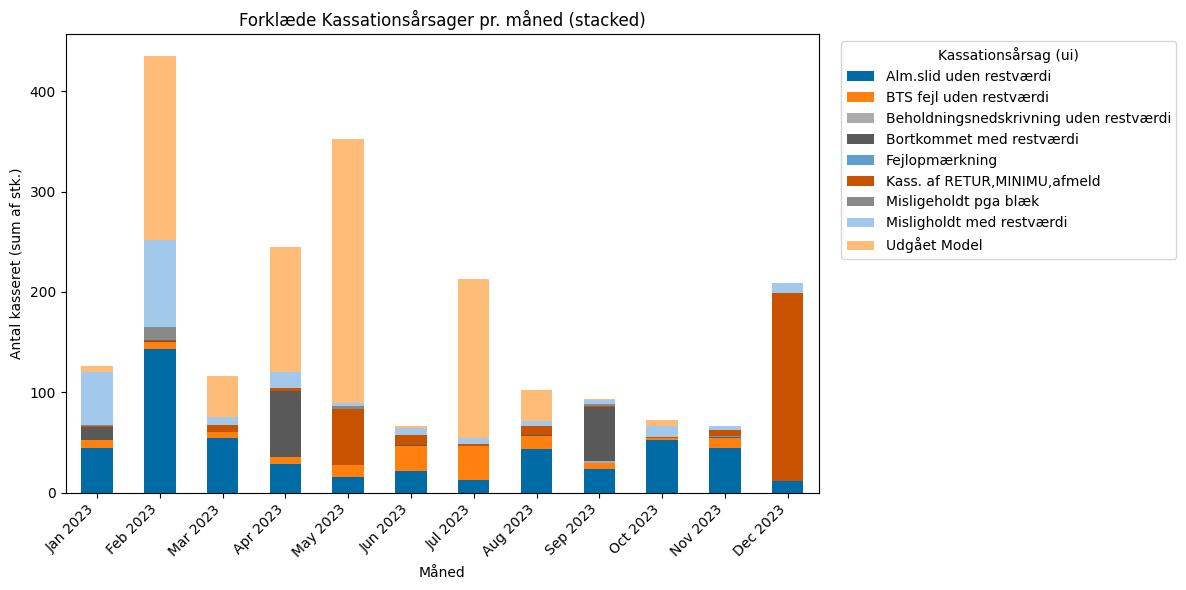

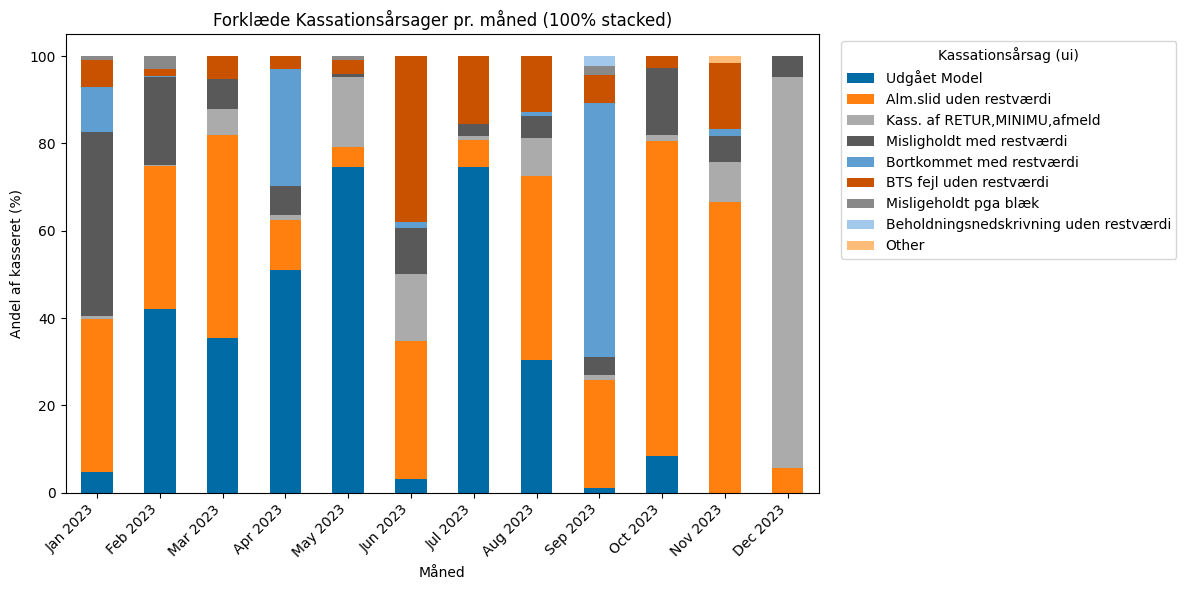

In [17]:
# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    forklæde_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Forklæde Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Forklæde Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Sokker

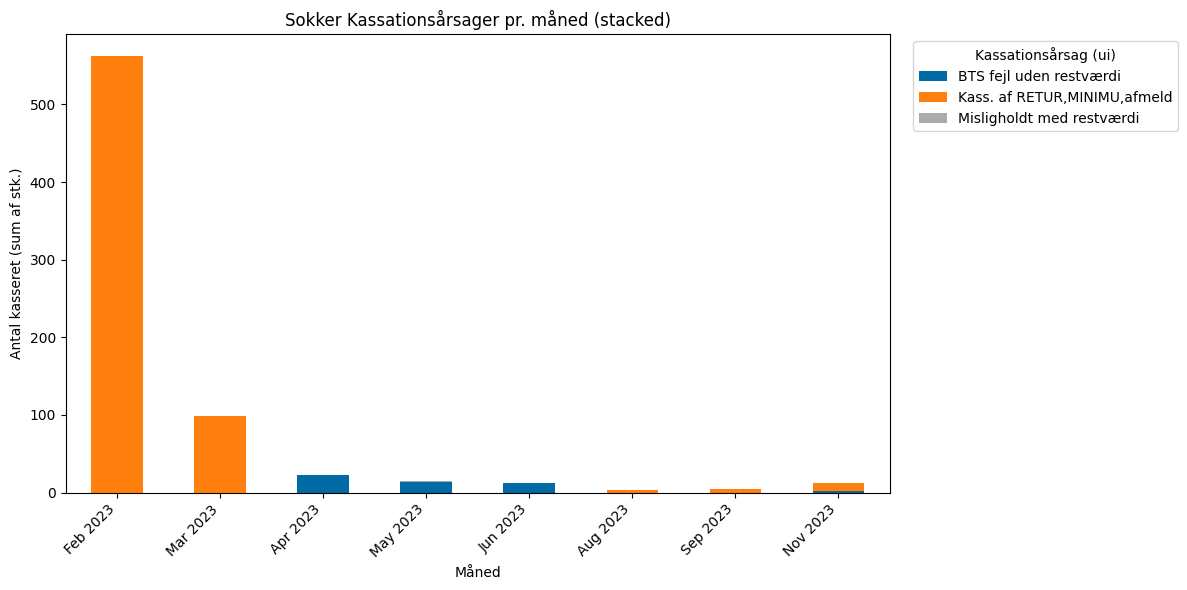

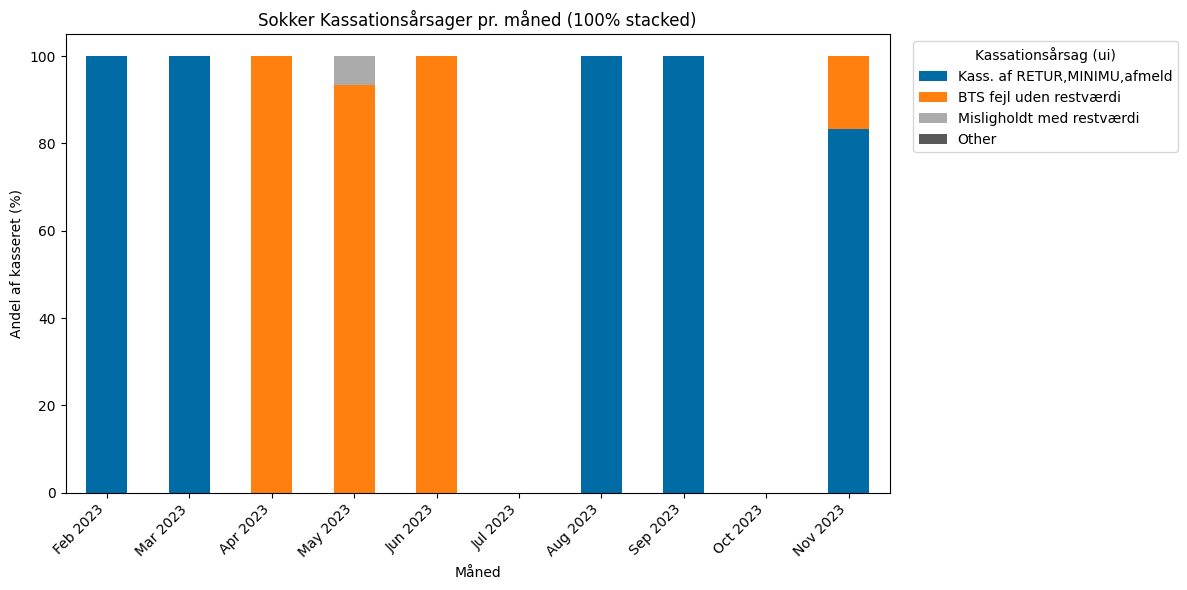

In [18]:
# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    sok_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Sokker Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Sokker Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Kittel

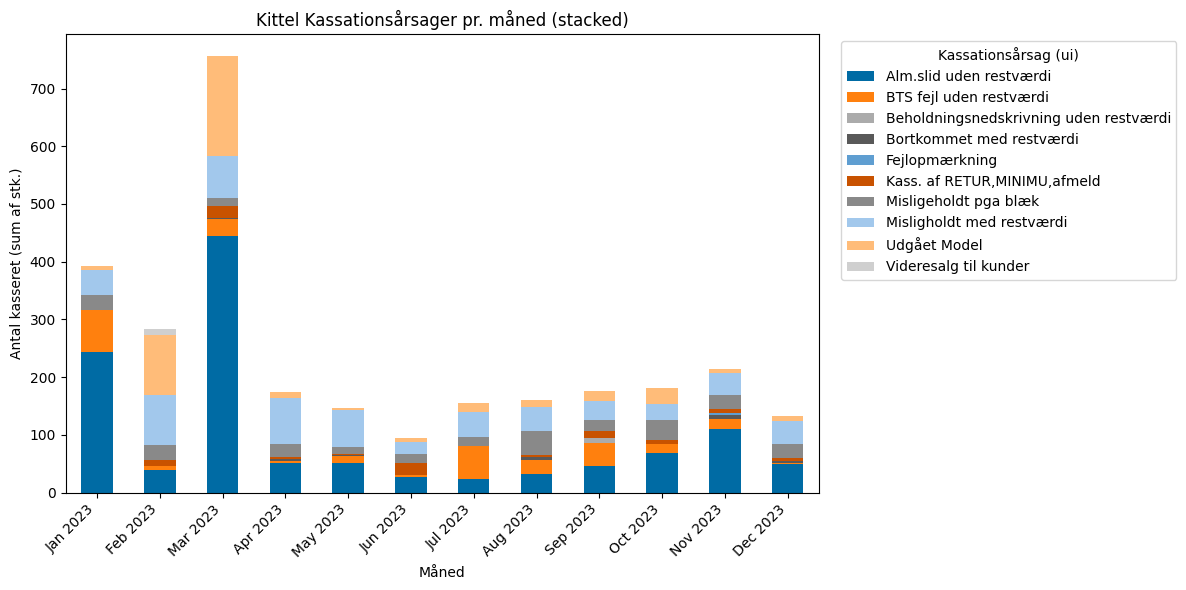

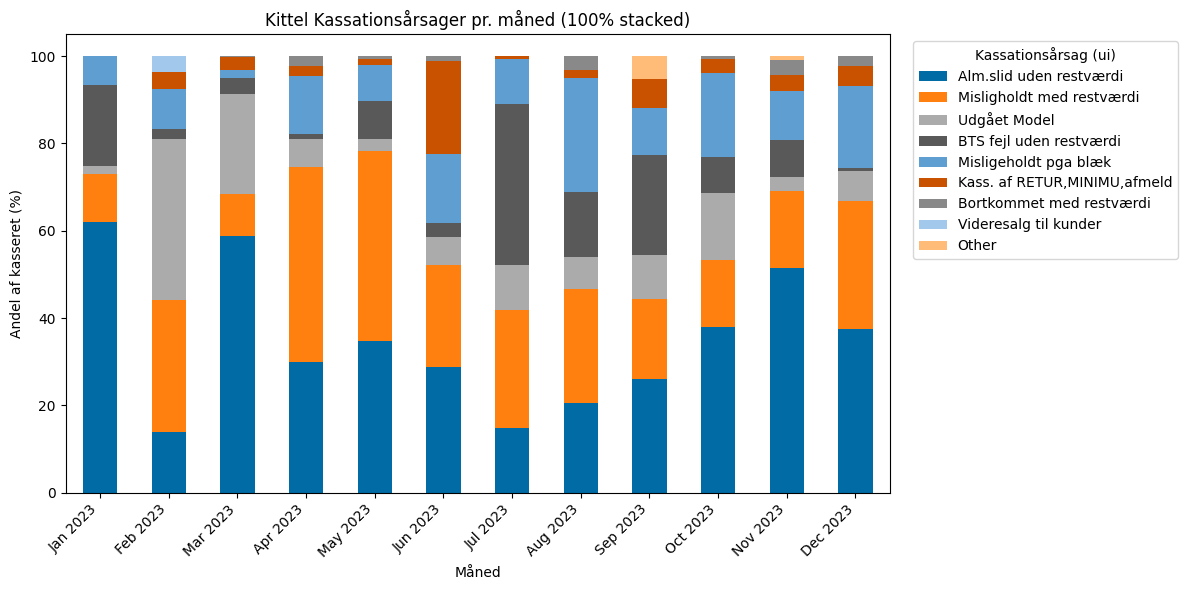

In [19]:
# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    kittel_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Kittel Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Kittel Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Busseron

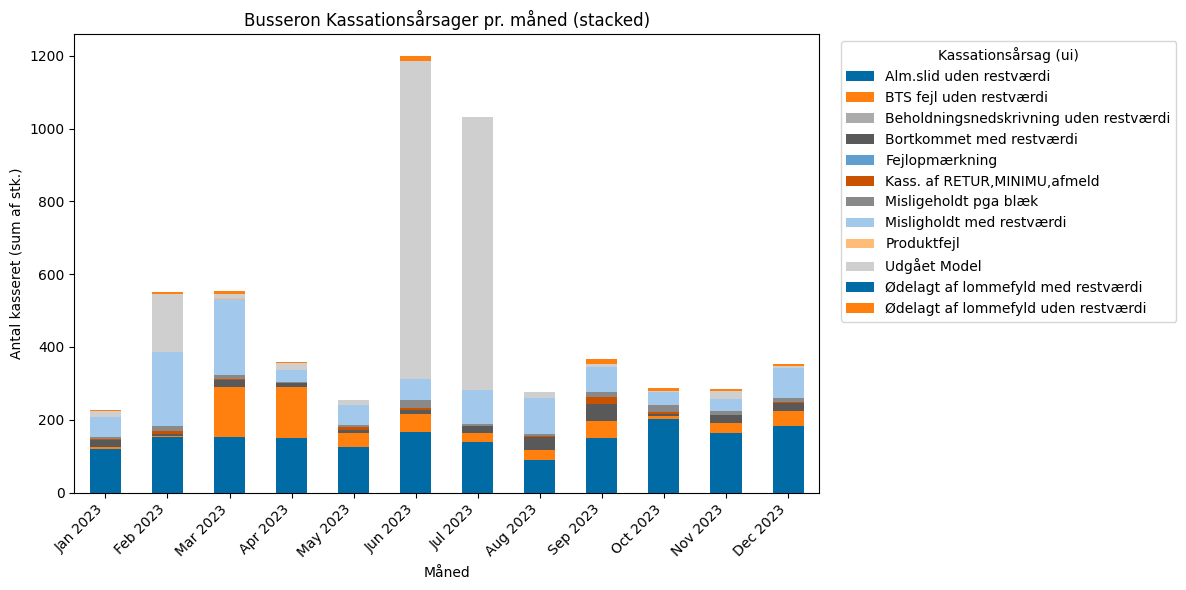

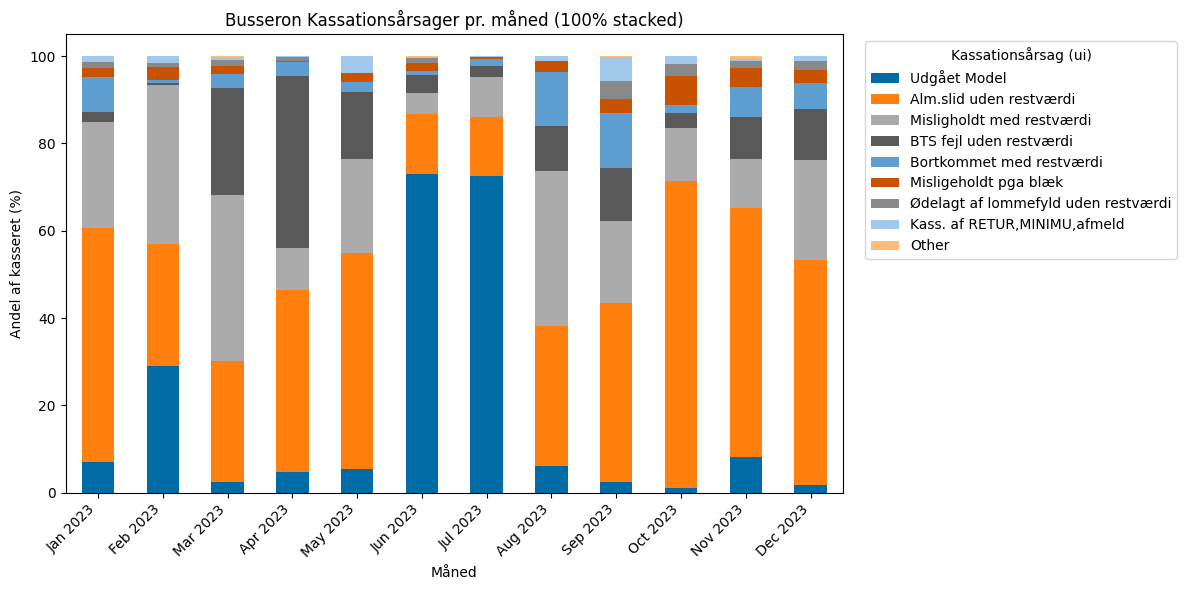

In [20]:
# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    busseron_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Busseron Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Busseron Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Andet

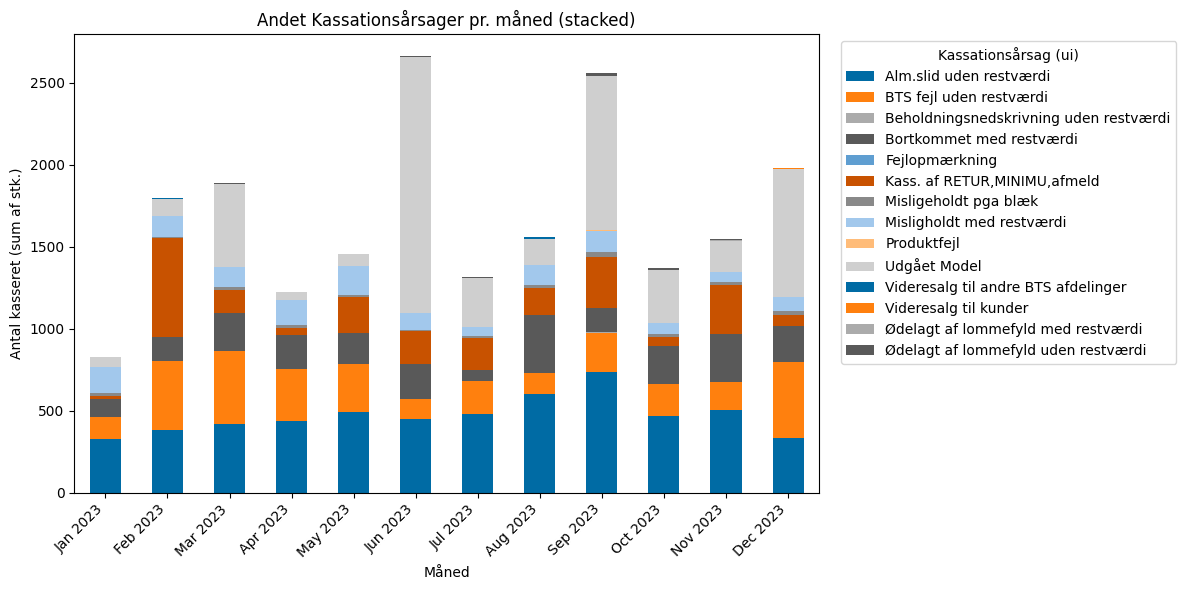

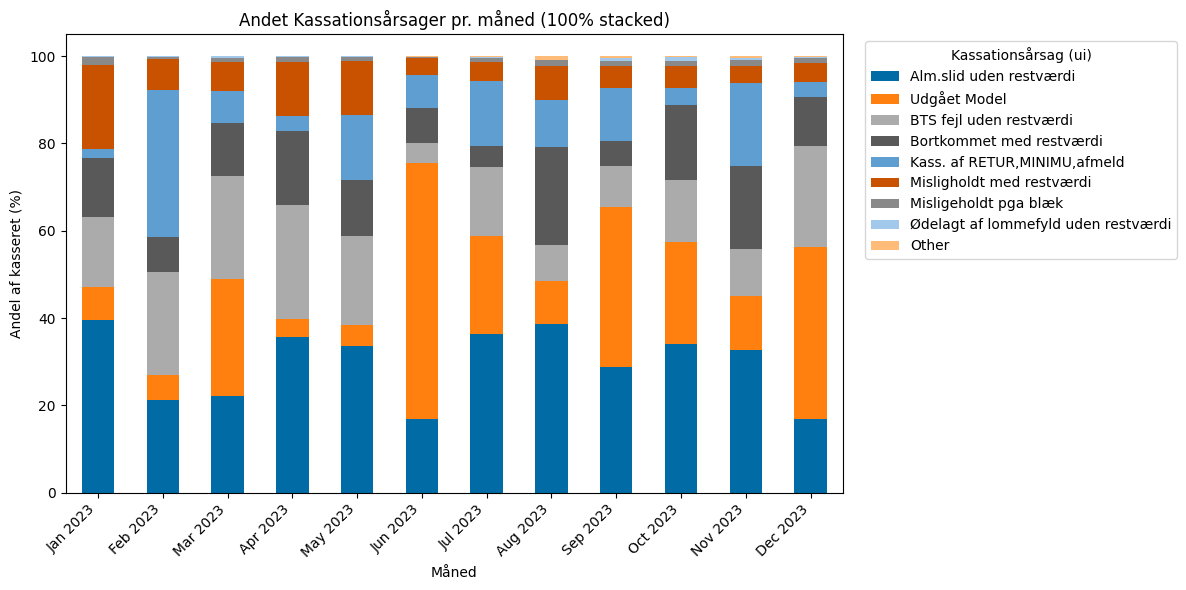

In [21]:
# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    andre_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Andet Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Andet Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

## Ikke Grupperet

In [22]:
stack_data = (
    all_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

<Figure size 1200x600 with 0 Axes>

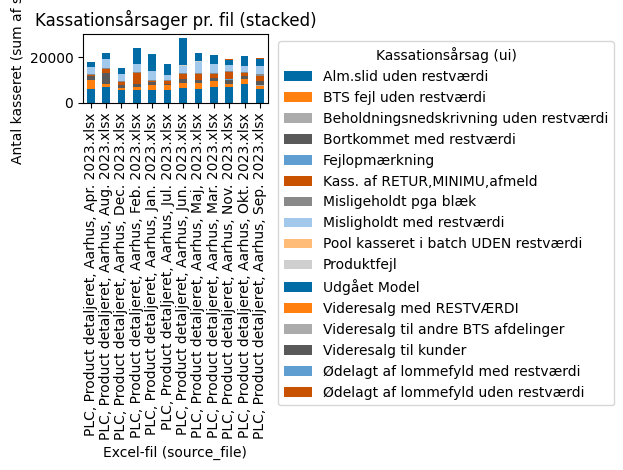

In [23]:
stack_data = stack_data.sort_index()

plt.figure(figsize=(12, 6))
stack_data.plot(kind="bar", stacked=True)

plt.ylabel("Antal kasseret (sum af stk.)")
plt.xlabel("Excel-fil (source_file)")
plt.title("Kassationsårsager pr. fil (stacked)")
plt.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [24]:

# 0) BYG en frisk pivot igen (vigtigt!)
stack_raw = (
    all_data
    .groupby(["source_file", "Kassationsårsag (ui)"])["Stk. tøj per kassationsdato"]
    .sum()
    .unstack(fill_value=0)
)

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Maj": "May", "May": "May",
    "Jun": "Jun", "Jul": "Jul", "Aug": "Aug", "Sep": "Sep",
    "Okt": "Oct", "Oct": "Oct",
    "Nov": "Nov", "Dec": "Dec",
}

idx = stack_raw.index.to_series().astype(str)
ex = idx.str.extract(r'([A-Za-zÆØÅæøå]{3})[.,]?\s*(\d{4})')

stack_raw["Mon_raw"] = ex[0]
stack_raw["Year"] = ex[1]
stack_raw["Mon_en"] = stack_raw["Mon_raw"].map(month_map).fillna(stack_raw["Mon_raw"])

stack_raw["Month_str"] = stack_raw["Mon_en"] + " " + stack_raw["Year"]
stack_raw["Month_dt"] = pd.to_datetime(stack_raw["Month_str"], format="%b %Y", errors="coerce")

print("Antal NaT:", stack_raw["Month_dt"].isna().sum())
print("Maj rows:", (stack_raw["Month_dt"].dt.month == 5).sum())
print("Filer der indeholder 'Maj':", [s for s in stack_raw.index if "Maj" in str(s)])


Antal NaT: 0
Maj rows: 1
Filer der indeholder 'Maj': ['PLC, Product detaljeret, Aarhus, Maj, 2023.xlsx']


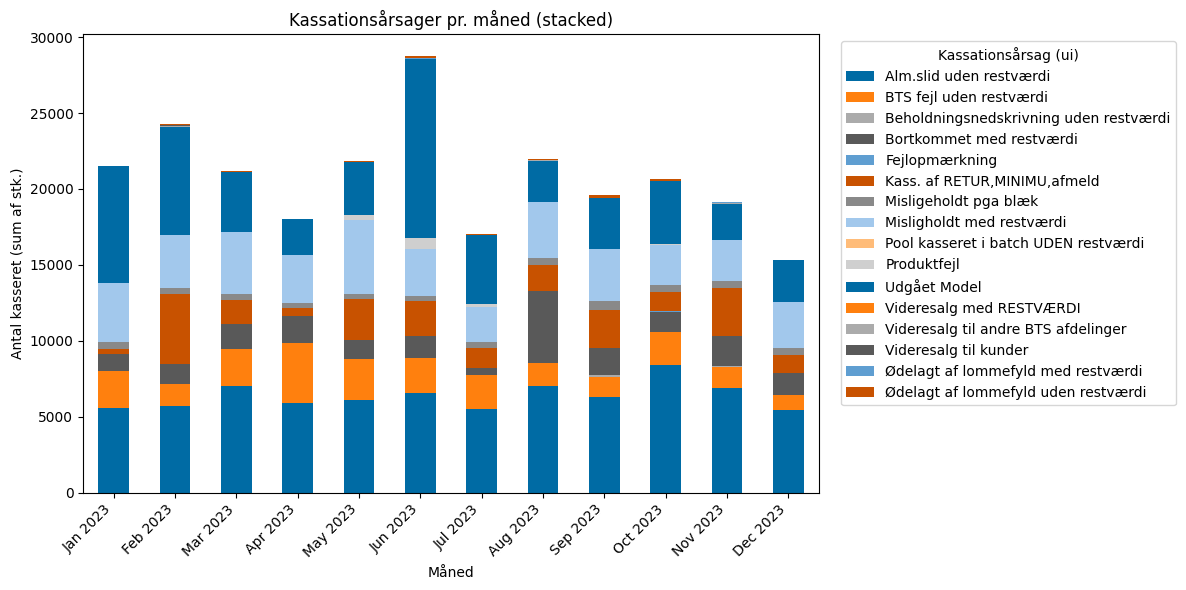

In [25]:
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]
plot_df = plot_df.groupby(level=0).sum().sort_index()
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df.index], rotation=45, ha="right")

ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Kassationsårsager pr. måned (stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


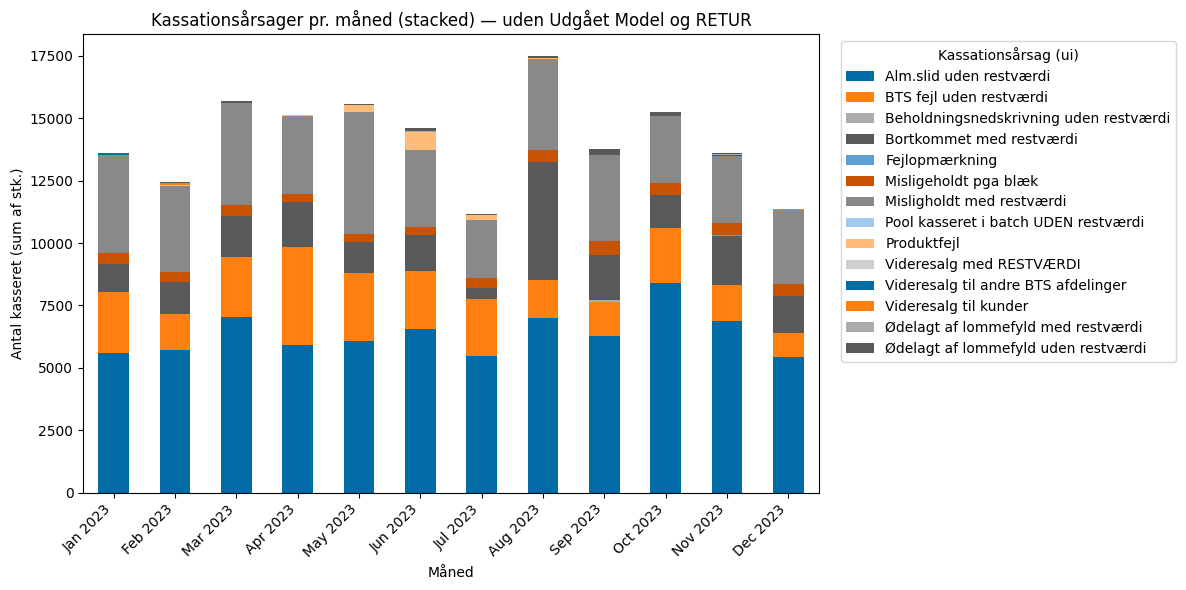

In [26]:
exclude = ["Udgået Model", "Kass. af RETUR,MINIMU,afmeld"]  # tilpas efter behov

plot_df2 = plot_df.drop(columns=exclude, errors="ignore")
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

ax = plot_df2.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Kassationsårsager pr. måned (stacked) — uden Udgået Model og RETUR")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df2.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()


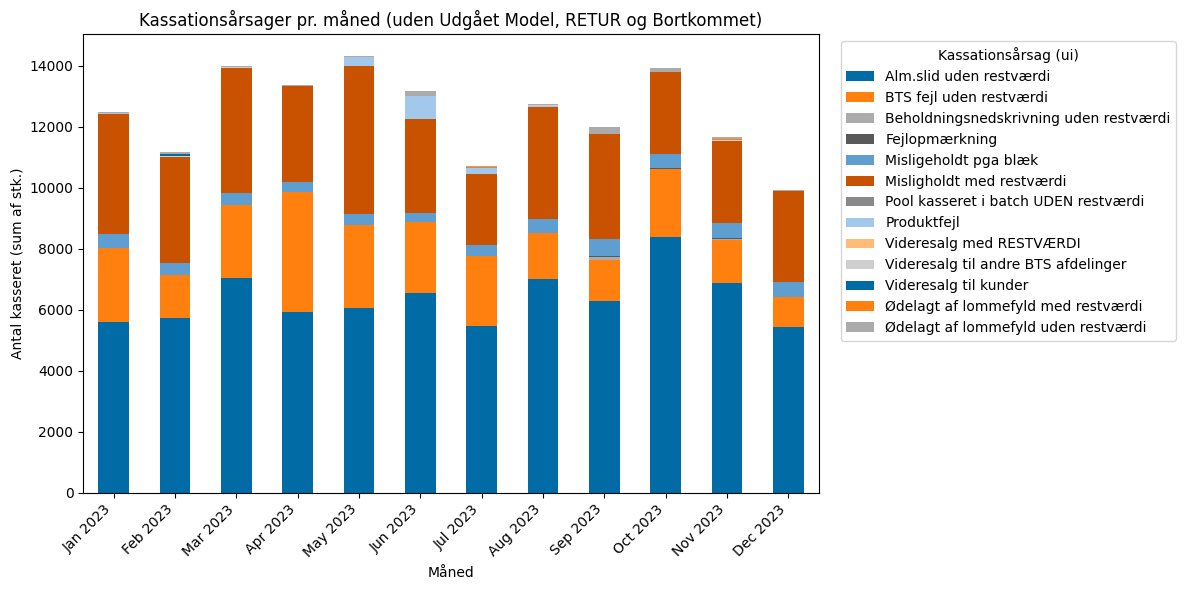

In [27]:
exclude = [
    "Udgået Model",
    "Kass. af RETUR,MINIMU,afmeld",
    "Bortkommet med restværdi"
]


plot_df2 = plot_df.drop(columns=exclude, errors="ignore")
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = plot_df2.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Antal kasseret (sum af stk.)")
ax.set_title("Kassationsårsager pr. måned (uden Udgået Model, RETUR og Bortkommet)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

ax.set_xticklabels([d.strftime("%b %Y") for d in plot_df2.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()

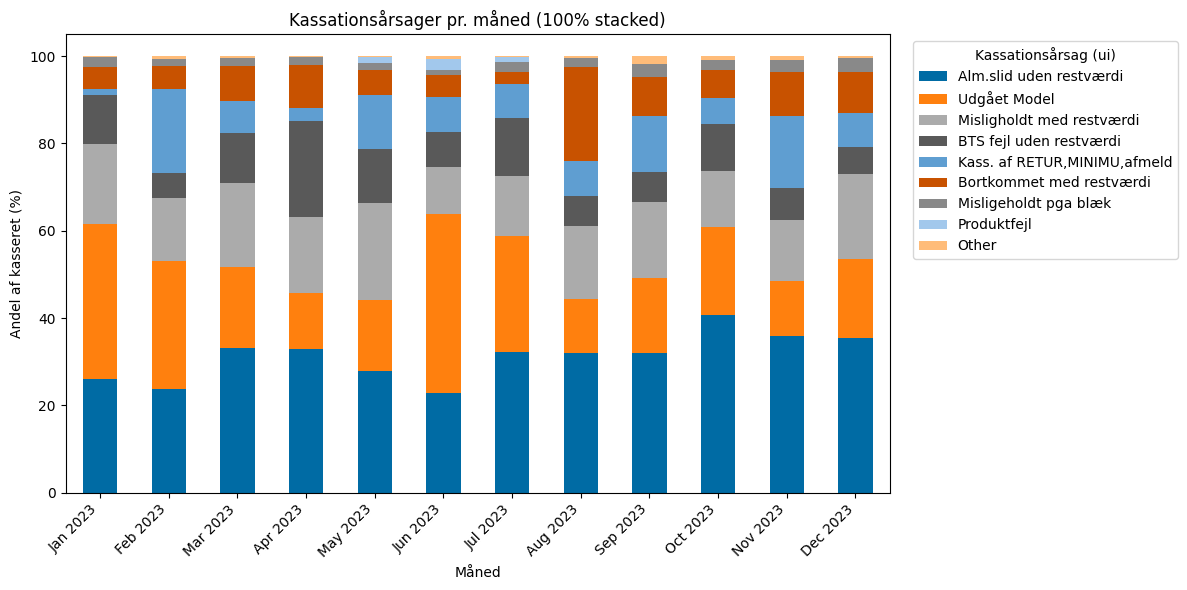

In [28]:

# --- Brug samme plot_df som i dit stacked count plot ---
plot_df = stack_raw.drop(columns=["Mon_raw","Year","Mon_en","Month_str","Month_dt"])
plot_df.index = stack_raw["Month_dt"]

# én række pr måned + kronologisk
plot_df = plot_df.groupby(level=0).sum().sort_index()

# (valgfrit) sikre alle måneder med, også hvis 0
full_months = pd.date_range(plot_df.index.min(), plot_df.index.max(), freq="MS")
plot_df = plot_df.reindex(full_months, fill_value=0)

# --- TopN + Other ---
topN = 8
totals = plot_df.sum(axis=0).sort_values(ascending=False)
top_cols = totals.head(topN).index

plot_top = plot_df[top_cols].copy()
plot_top["Other"] = plot_df.drop(columns=top_cols).sum(axis=1)

# --- Procenter (robust mod 0-rækker) ---
row_sum = plot_top.sum(axis=1)
stack_pct = plot_top.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100

# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")

# --- Plot ---
ax = stack_pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Kassationsårsager pr. måned (100% stacked)")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")

# pæne måned-labels
ax.set_xticklabels([d.strftime("%b %Y") for d in stack_pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()


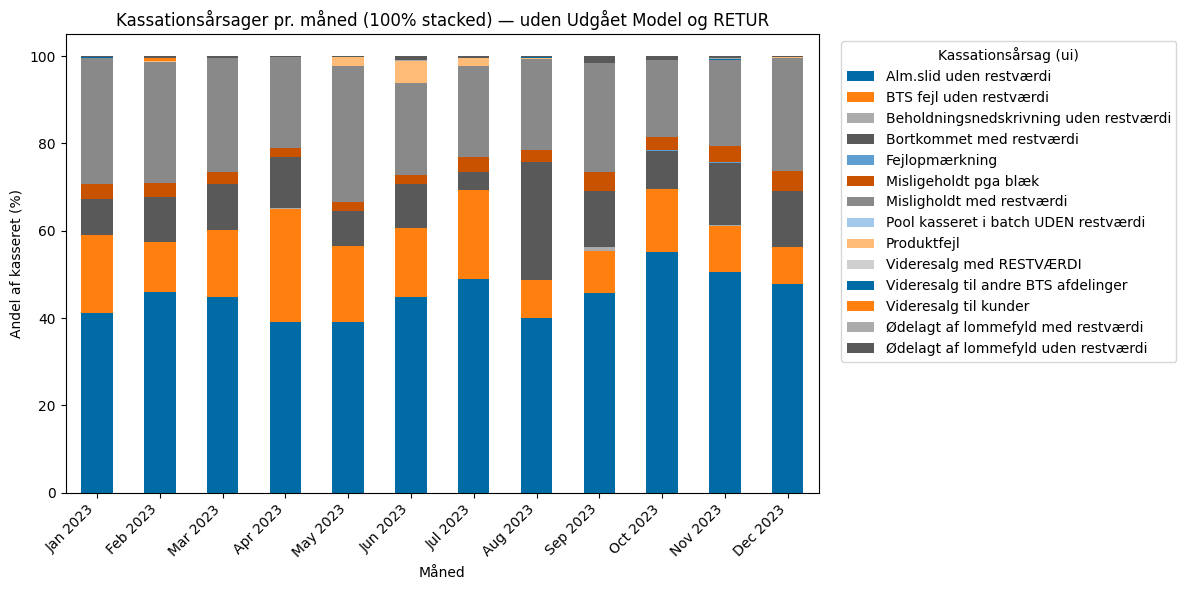

In [29]:
exclude = ["Udgået Model", "Kass. af RETUR,MINIMU,afmeld","Bortkommmet med restværdi"]

df2 = plot_df.drop(columns=exclude, errors="ignore")

row_sum = df2.sum(axis=1)
pct = df2.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Kassationsårsager pr. måned (100% stacked) — uden Udgået Model og RETUR")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.set_xticklabels([d.strftime("%b %Y") for d in pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()


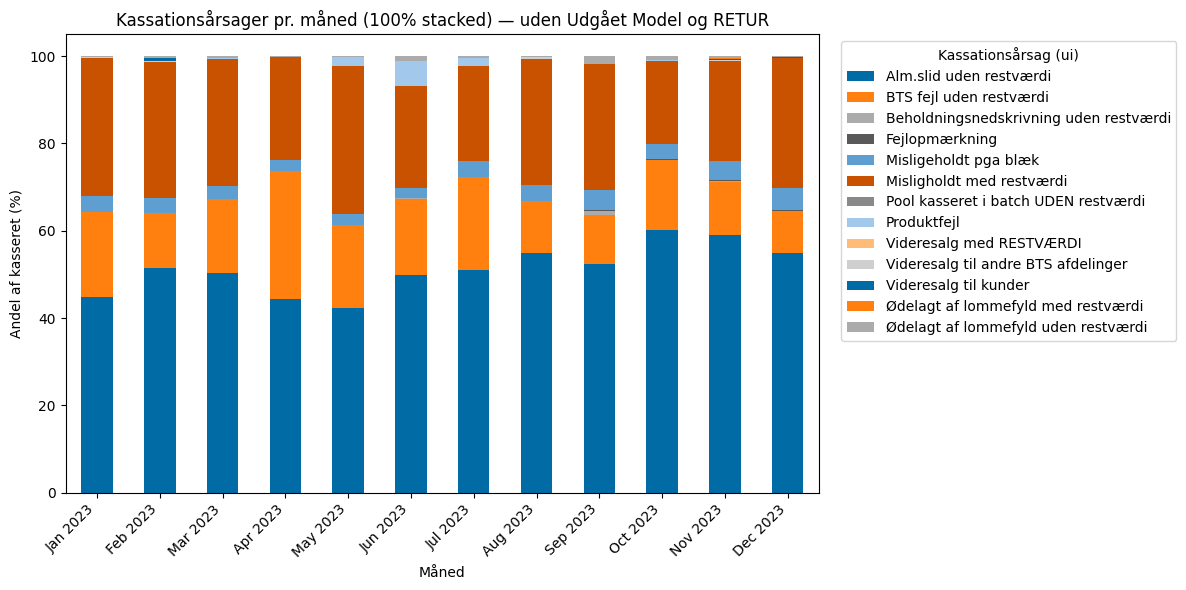

In [30]:
exclude = [
    "Udgået Model",
    "Kass. af RETUR,MINIMU,afmeld",
    "Bortkommet med restværdi"
]
df2 = plot_df.drop(columns=exclude, errors="ignore")

row_sum = df2.sum(axis=1)
pct = df2.div(row_sum.where(row_sum.ne(0), 1), axis=0) * 100
# Fordi tobias er udfordret af farverne.
plt.style.use("tableau-colorblind10")
ax = pct.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Måned")
ax.set_ylabel("Andel af kasseret (%)")
ax.set_title("Kassationsårsager pr. måned (100% stacked) — uden Udgået Model og RETUR")
ax.legend(title="Kassationsårsag (ui)", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.set_xticklabels([d.strftime("%b %Y") for d in pct.index], rotation=45, ha="right")

plt.tight_layout()
plt.show()